# Disease diagnosis and triage assistant

### Problem statment

Community Health Volunteers (CHVs) are often the first point of contact for healthcare in underserved communities. However, they face significant challenges due to limited medical training, lack of diagnostic tools, and the absence of real-time decision support. These limitations can lead to misdiagnoses, delayed referrals, and inadequate care—especially in cases where early intervention is critical.

### Business understanding

This project aims to build an AI-powered model that assists CHVs in making informed diagnostic decisions and in determining the urgency of patient referrals. By analyzing patient data and symptoms, the model will classify cases into categories such as:

Urgent referral (needs immediate attention at a health facility),

Routine referral (can wait for scheduled visits),

Manage at home (monitor or treat locally with CHV support).

The goal is to empower CHVs with a tool that enhances accuracy, consistency, and speed in decision-making, ultimately improving health outcomes in resource-constrained settings.

### Objectives

- Provide real-time diagnosis assistance using patient inputs.

- Prioritize cases based on severity to support timely referrals.

- Reduce misjudgments caused by limited medical knowledge or intuition.

- Collect and store patient data for follow-up, analytics, and reporting.



In [21]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ML-specific libraries (we'll use these later for modeling)
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


In [22]:
# Define dataset paths
dataset_paths = {
    'main': 'archive/dataset.csv',
    'description': 'archive/symptom_Description.csv',
    'precaution': 'archive/symptom_precaution.csv',
    'severity': 'archive/Symptom-severity.csv'
}

# Load all datasets
df_main = pd.read_csv(dataset_paths['main'])
df_description = pd.read_csv(dataset_paths['description'])
df_precaution = pd.read_csv(dataset_paths['precaution'])
df_severity = pd.read_csv(dataset_paths['severity'])


### 1. Explorative data analysis(EDA)

In [23]:
# Utility function to explore a dataset
def explore(df, name="Dataset"):
    print(f"\n Exploring: {name}")
    display(df.head(7))                  # Show first 7 rows
    print("\n Info:")
    print(df.info())
    print("\n Shape:", df.shape)       # Show shape
    print("\n Description:")
    display(df.describe(include='all'))  # Show descriptive stats
    print("\n Missing Values:")
    print(df.isnull().sum())             # Show missing values
    print("\n Duplicated Rows:", df.duplicated().sum())  # Check for duplicates
    print("\n Value Counts (First Column):")
    print(df.iloc[:, 0].value_counts(dropna=False))  # Value counts of first column


In [24]:
#  Explore each dataset
explore(df_main, "Main Dataset")



 Exploring: Main Dataset


,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



 Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Disease     4920 non-null   object
 1   Symptom_1   4920 non-null   object
 2   Symptom_2   4920 non-null   object
 3   Symptom_3   4920 non-null   object
 4   Symptom_4   4572 non-null   object
 5   Symptom_5   3714 non-null   object
 6   Symptom_6   2934 non-null   object
 7   Symptom_7   2268 non-null   object
 8   Symptom_8   1944 non-null   object
 9   Symptom_9   1692 non-null   object
 10  Symptom_10  1512 non-null   object
 11  Symptom_11  1194 non-null   object
 12  Symptom_12  744 non-null    object
 13  Symptom_13  504 non-null    object
 14  Symptom_14  306 non-null    object
 15  Symptom_15  240 non-null    object
 16  Symptom_16  192 non-null    object
 17  Symptom_17  72 non-null     object
dtypes: object(18)
memory usage: 692.0+ KB
None

 Shape: (4920, 18)

 Description:


,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
count,4920,4920,4920,4920,4572,3714,2934,2268,1944,1692,1512,1194,744,504,306,240,192,72
unique,41,34,48,54,50,38,32,26,21,22,21,18,11,8,4,3,3,1
top,Fungal infection,vomiting,vomiting,fatigue,high_fever,headache,nausea,abdominal_pain,abdominal_pain,yellowing_of_eyes,yellowing_of_eyes,irritability,malaise,muscle_pain,chest_pain,chest_pain,blood_in_sputum,muscle_pain
freq,120,822,870,726,378,348,390,264,276,228,198,120,126,72,96,144,72,72



 Missing Values:
Disease          0
Symptom_1        0
Symptom_2        0
Symptom_3        0
Symptom_4      348
Symptom_5     1206
Symptom_6     1986
Symptom_7     2652
Symptom_8     2976
Symptom_9     3228
Symptom_10    3408
Symptom_11    3726
Symptom_12    4176
Symptom_13    4416
Symptom_14    4614
Symptom_15    4680
Symptom_16    4728
Symptom_17    4848
dtype: int64

 Duplicated Rows: 4616

 Value Counts (First Column):
Disease
Fungal infection                           120
Allergy                                    120
GERD                                       120
Chronic cholestasis                        120
Drug Reaction                              120
Peptic ulcer diseae                        120
AIDS                                       120
Diabetes                                   120
Gastroenteritis                            120
Bronchial Asthma                           120
Hypertension                               120
Migraine                                   120


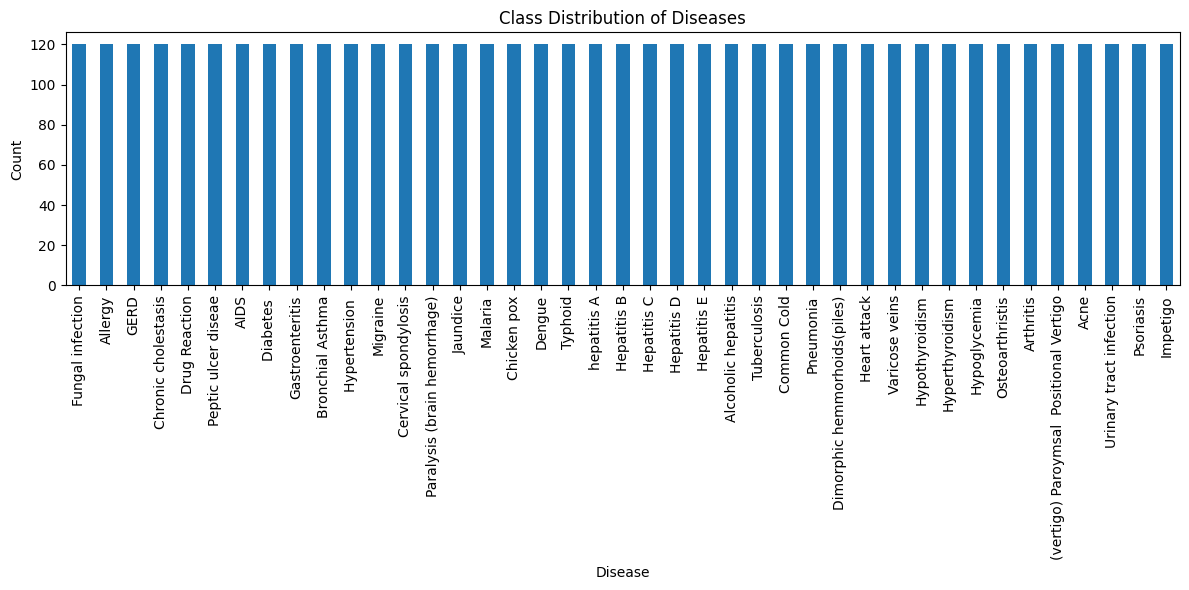

In [25]:
# Count of each disease (class)
plt.figure(figsize=(12, 6))
df_main['Disease'].value_counts().plot(kind='bar')
plt.title('Class Distribution of Diseases')
plt.xlabel('Disease')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [26]:
explore(df_description, "Symptom Descriptions")



 Exploring: Symptom Descriptions


,Disease,Description
0,Drug Reaction,An adverse drug reaction (ADR) is an injury ca...
1,Malaria,An infectious disease caused by protozoan para...
2,Allergy,An allergy is an immune system response to a f...
3,Hypothyroidism,"Hypothyroidism, also called underactive thyroi..."
4,Psoriasis,Psoriasis is a common skin disorder that forms...
5,GERD,"Gastroesophageal reflux disease, or GERD, is a..."
6,Chronic cholestasis,"Chronic cholestatic diseases, whether occurrin..."



 Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Disease      41 non-null     object
 1   Description  41 non-null     object
dtypes: object(2)
memory usage: 788.0+ bytes
None

 Shape: (41, 2)

 Description:


,Disease,Description
count,41,41
unique,41,41
top,Drug Reaction,An adverse drug reaction (ADR) is an injury ca...
freq,1,1



 Missing Values:
Disease        0
Description    0
dtype: int64

 Duplicated Rows: 0

 Value Counts (First Column):
Disease
Drug Reaction                              1
Malaria                                    1
Allergy                                    1
Hypothyroidism                             1
Psoriasis                                  1
GERD                                       1
Chronic cholestasis                        1
hepatitis A                                1
Osteoarthristis                            1
(vertigo) Paroymsal  Positional Vertigo    1
Hypoglycemia                               1
Acne                                       1
Diabetes                                   1
Impetigo                                   1
Hypertension                               1
Peptic ulcer diseae                        1
Dimorphic hemorrhoids(piles)               1
Common Cold                                1
Chicken pox                                1
Cervical spondylosis

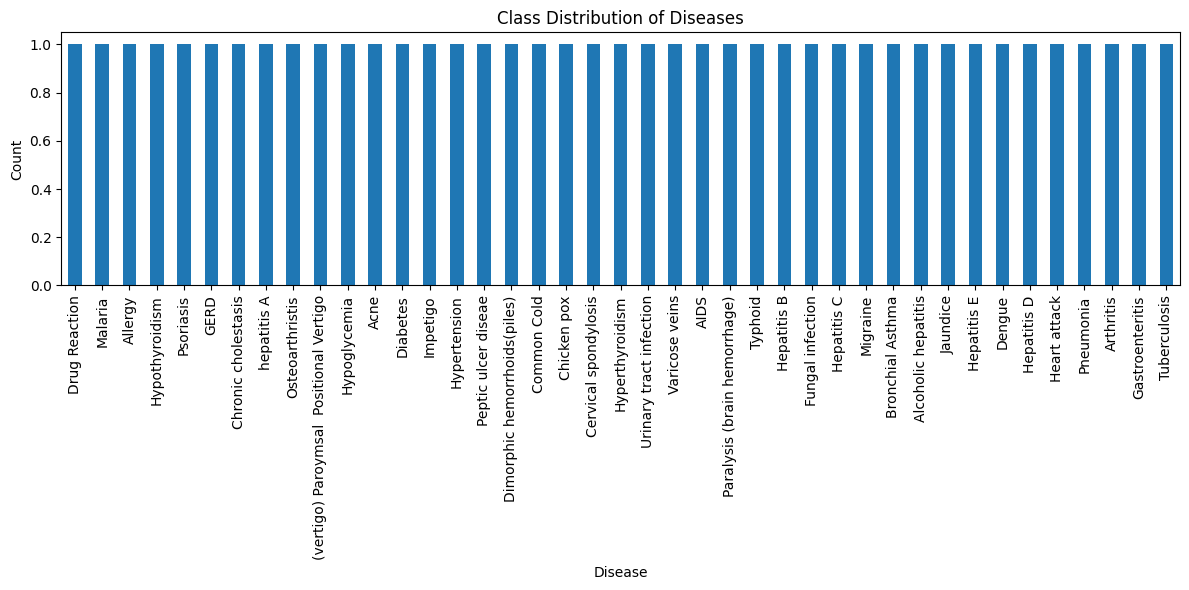

In [27]:
# Count of each disease (class)
plt.figure(figsize=(12, 6))
df_description['Disease'].value_counts().plot(kind='bar')
plt.title('Class Distribution of Diseases')
plt.xlabel('Disease')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [28]:
explore(df_precaution, "Symptom Precautions")



 Exploring: Symptom Precautions


,Disease,Precaution_1,Precaution_2,Precaution_3,Precaution_4
0,Drug Reaction,stop irritation,consult nearest hospital,stop taking drug,follow up
1,Malaria,Consult nearest hospital,avoid oily food,avoid non veg food,keep mosquitos out
2,Allergy,apply calamine,cover area with bandage,NaN,use ice to compress itching
3,Hypothyroidism,reduce stress,exercise,eat healthy,get proper sleep
4,Psoriasis,wash hands with warm soapy water,stop bleeding using pressure,consult doctor,salt baths
5,GERD,avoid fatty spicy food,avoid lying down after eating,maintain healthy weight,exercise
6,Chronic cholestasis,cold baths,anti itch medicine,consult doctor,eat healthy



 Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Disease       41 non-null     object
 1   Precaution_1  41 non-null     object
 2   Precaution_2  41 non-null     object
 3   Precaution_3  40 non-null     object
 4   Precaution_4  40 non-null     object
dtypes: object(5)
memory usage: 1.7+ KB
None

 Shape: (41, 5)

 Description:


,Disease,Precaution_1,Precaution_2,Precaution_3,Precaution_4
count,41,41,41,40,40
unique,41,32,34,30,24
top,Drug Reaction,Consult nearest hospital,exercise,consult doctor,follow up
freq,1,3,3,6,6



 Missing Values:
Disease         0
Precaution_1    0
Precaution_2    0
Precaution_3    1
Precaution_4    1
dtype: int64

 Duplicated Rows: 0

 Value Counts (First Column):
Disease
Drug Reaction                              1
Malaria                                    1
Allergy                                    1
Hypothyroidism                             1
Psoriasis                                  1
GERD                                       1
Chronic cholestasis                        1
hepatitis A                                1
Osteoarthristis                            1
(vertigo) Paroymsal  Positional Vertigo    1
Hypoglycemia                               1
Acne                                       1
Diabetes                                   1
Impetigo                                   1
Hypertension                               1
Peptic ulcer diseae                        1
Dimorphic hemmorhoids(piles)               1
Common Cold                                1
Chicken p

In [29]:
explore(df_severity, "Symptom Severity")


 Exploring: Symptom Severity


,Symptom,weight
0,itching,1
1,skin_rash,3
2,nodal_skin_eruptions,4
3,continuous_sneezing,4
4,shivering,5
5,chills,3
6,joint_pain,3



 Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133 entries, 0 to 132
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Symptom  133 non-null    object
 1   weight   133 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.2+ KB
None

 Shape: (133, 2)

 Description:


,Symptom,weight
count,133,133.000000
unique,132,NaN
top,fluid_overload,NaN
freq,2,NaN
mean,NaN,4.225564
std,NaN,1.323543
min,NaN,1.000000
25%,NaN,3.000000
50%,NaN,4.000000
75%,NaN,5.000000



 Missing Values:
Symptom    0
weight     0
dtype: int64

 Duplicated Rows: 0

 Value Counts (First Column):
Symptom
fluid_overload          2
itching                 1
nodal_skin_eruptions    1
skin_rash               1
continuous_sneezing     1
                       ..
inflammatory_nails      1
blister                 1
red_sore_around_nose    1
yellow_crust_ooze       1
prognosis               1
Name: count, Length: 132, dtype: int64
